In [3]:
cd C:\Users\ic07949\desktop\personal\hong\HW3\Face

C:\Users\ic07949\desktop\personal\hong\HW3\Face


In [205]:
import numpy as np
import pandas as pd

import matplotlib.image as mpimg
import matplotlib.pyplot as plt 

from os import listdir
from os.path import isfile, join

from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

a- Download the dataset “Face” from CSNS. Check out the dataset. 
Open some of the jpg images. This is the Oivetti database of face images from AT&T research lab. 
It includes 400 faces (64x64 pixels) from 40 people (10 images per person).

You have to also download the csv file that includes the labels of the images (the label is person’s ID). 
The goal is to build a Face Recognition algorithm to recognize each person using
PCA dimensionality reduction and a non-linear SVM.

you can use:
mpimg.imread(file_name) to load an image, and
plt.imshow(image_name, cmap=plt.cm.gray) to show an image (This is a little different from what we had in HW2!). 
Add %matplotlib inline at top images will be shown inside the Jupyter explorer page.

In [26]:
cd C:\Users\ic07949\desktop\personal\hong\HW3

C:\Users\ic07949\desktop\personal\hong\HW3


In [27]:
label_df = pd.read_csv('label.csv')
label_df.shape

(400, 1)

In [28]:
cd C:\Users\ic07949\desktop\personal\hong\HW3\Face

C:\Users\ic07949\desktop\personal\hong\HW3\Face


In [29]:
a = mpimg.imread('0.jpg')

%matplotlib inline
plt.imshow(a , cmap=plt.cm.gray)

b- Build the feature matrix and label vector: Each image is considered as a data sample with
pixels as features. Thus, to build the feature table you have to convert each 64x64 image into
a row of the feature matrix with 4096 columns.

In [31]:
mypath = "C:\\Users\\ic07949\\desktop\\personal\\hong\\HW3\\Face"

In [47]:
onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
onlyfiles.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))

images = np.empty(len(onlyfiles), dtype=object)

for i in range(0, len(onlyfiles)):
    images[i] = mpimg.imread( join(mypath,onlyfiles[i]) )
    images[i] = images[i].ravel()

In [57]:
images = pd.DataFrame(images, columns = ['name'])

images_df = pd.DataFrame()

for i in range(400):
    k =  pd.DataFrame(images["name"][399-i]).T
    images_df = k.append(images_df)
    
images_df = images_df.reset_index()

master_df = pd.concat([label_df, images_df], axis =1)

In [176]:
del master_df['index']

In [177]:
master_df.head()

,Label,0,1,2,3,4,5,6,7,8,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,13,186,183,179,190,212,219,221,232,230,...,56,45,47,18,0,8,15,9,3,5
1,30,204,198,194,195,198,195,190,186,190,...,19,0,29,52,90,146,130,120,164,167
2,34,86,79,82,95,100,102,121,146,169,...,160,167,179,169,192,188,197,189,185,141
3,19,61,90,98,119,144,156,174,177,183,...,119,244,246,168,126,187,162,145,58,18
4,24,99,134,165,183,201,210,215,224,232,...,83,90,94,90,70,41,71,103,92,117


c- Normalize each column of your feature matrix (This is required!).

In [ ]:
master_df_x = master_df.iloc[:,3:4098]
master_df_y = master_df["Label"]

In [163]:
#Performing min-max normalization to rescale numeric attributes

min_max_scaler = preprocessing.MinMaxScaler().fit(master_df_x)
master_df_x_norm = min_max_scaler.transform(master_df_x)


In [190]:
master_df_x_norm.shape

(400, 4095)

d- Use sklearn functions to split the Normalized dataset into testing and training sets with the
following parameters: test_size=0.25, random_state=5.

In [164]:
master_df_x_norm_train, master_df_x_norm_test, master_df_y_train, master_df_y_test= train_test_split(master_df_x_norm, master_df_y , test_size=0.25, random_state=5)

e- The dimensionality of the data samples is 4096. Use PCA to reduce the dimensionality from 4096 to 50 (i.e. only 50 principal components!). 

You should “fit” your PCA on your training set only, and then use this fitted model to “transform” both training and testing sets (When you finish this step, the number of columns in your testing and training sets should be 50).

We will cover the details of PCA in next session of class. For now, you can use this format:
from sklearn.decomposition import PCA k = 50(k is the number of components (new features) after dimensionality reduction) my_pca = PCA(n_components = k)

X_Train is feature matrix of training set before dimensionality reduction,
X_Train_New is feature matrix of training set after dimensionality reduction:
X_Train_new = my_pca. fit_transform(X_Train)
X_Test_new = my_pca. transform(X_Test)

In [165]:
from sklearn.decomposition import PCA
k = 50 # (k is the number of components (new features) after dimensionality reduction)
my_pca = PCA(n_components = k)

In [236]:
# X_Train is feature matrix of training set before dimensionality reduction,
# X_Train_New is feature matrix of training set after dimensionality reduction:
X_Train_new = my_pca.fit_transform(master_df_x_norm_train)
X_Test_new = my_pca.transform(master_df_x_norm_test)
master_df_x_norm_new = my_pca.transform(master_df_x_norm)

In [237]:
master_df_x_norm_new .shape

(400, 50)

f- Design and Train a non-linear SVM classifier to recognize the face based on the training
dataset that you built in part (d). Use SVC(C=1, kernel='rbf', gamma=0.0005,
random_state=1). Then, Test your SVM on testing set (from part(d)), and calculate and report
the accuracy. Also, calculate and report the Confusion Matrix.

In [212]:
svm = SVC(C=1, kernel='rbf', gamma=0.0005, random_state=1)

In [213]:
svm.fit(X_Train_new, master_df_y_train )

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0005, kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)

In [214]:
Y_predict_SVC = svm.predict(X_Test_new)

In [217]:
score_SVC = accuracy_score(master_df_y_test, Y_predict_SVC)

print('Accuracy score:',score_SVC)

Accuracy score: 0.07


In [216]:
cm = confusion_matrix(master_df_y_test,  Y_predict_SVC)
print('Confusion Matrix:', cm)

Confusion Matrix: [[0 0 0 ... 2 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]]


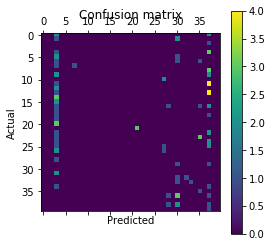

In [211]:
import pylab as plt
%matplotlib inline
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

g- Now, use GridSearchCV to find the best value for parameter C in your SVM. Search in this list:
[0.1, 1, 10, 100, 1e3, 5e3, 1e4, 5e4, 1e5]. Remember that we want to use cross-validation
method (GridSearchCV) to find the best C. 

Thus, you can again merge X_train_new and
X_test_new (after dimensionality reduction), and also merge y_train and y_test, and then
use GridSearchCV with 10-fold cross validation to find C.

In [231]:
from sklearn.model_selection import GridSearchCV

parameters = {'C':[0.1, 1, 10, 100, 1e3, 5e3, 1e4, 5e4, 1e5]}

svm = SVC(kernel='rbf', gamma=0.0005, random_state=1)

# creat the grid, and define the metric for evaluating the model: 
grid = GridSearchCV(svm, parameters)

In [238]:
grid.fit(master_df_x_norm_new , master_df_y)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0005, kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000.0, 5000.0, 10000.0, 50000.0, 100000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [239]:
# view the results:
#print(grid.cv_results_)

# view the best results corresponding to the best structure of ANN:
print(grid.best_score_)
print(grid.best_params_)

0.955
{'C': 100}
